# Question 1

## Deal with the data

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [20]:
!curl https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt >> f150_motor_distributors.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  249k  100  249k    0     0   152k      0  0:00:01  0:00:01 --:--:--  152k


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


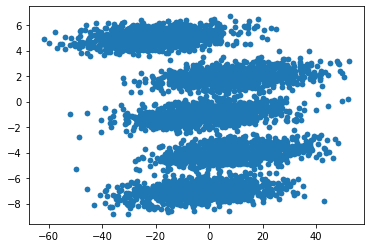

In [22]:
def loaddata():
  data = np.loadtxt('f150_motor_distributors.txt',delimiter=',')
  return data

X = loaddata()
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

## Question 1a.) Implement a simple k-means algorithm

In [23]:
# Compute Euclidean distance from point to centroids
def eucli(p,c):
  return np.sqrt(sum((p-c)**2))

In [24]:
# Get the Euclidean distance and find the nearest centroid of each points
# Update the centroids through computing all the mean of each group of points with same centroid
def UpdateCentroids(X, centroids):
    # Create idx as np array with length of data length
    idx = np.zeros(len(X))
    for i in range(len(X)):
        minDistance=float('inf')
        index=0
        for k in range(len(centroids)):
            # get euclidean distance of centroids
            distance=eucli(X[i], centroids[k])
            
            if(distance<minDistance):
                minDistance=distance
                index=k
        idx[i]=index

    # update the position of centroids
    for i in range(k):
      centroids[i] = np.mean(X[idx ==i], axis=0)
    return idx, centroids

In [25]:
def k_means(X, k, max_iters):
    initial_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
    # Start iterations
    for i in range(max_iters):
        if(i==0):
            centroids=initial_centroids

        # update centroids position
        idx, centroids = UpdateCentroids(X, centroids)
    return idx,centroids


In [26]:
# k=5 cluster, max_iterations=100
idx,centroids = k_means(X, 5, 100)



## Question 1b.) Scatter the results in two dimensions with different clusters as different colors.

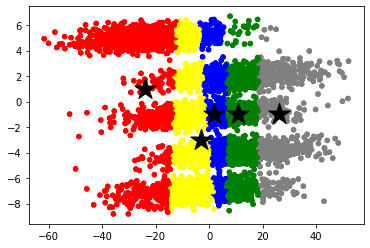

In [27]:
cm_dark = mpl.colors.ListedColormap(['grey', 'red', 'blue', 'green', 'yellow'])
# data points
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=cm_dark, s=20)
# centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='*', s=500)
plt.show()

## Question 1c.)

We can easily observe the 5 clusters from the pattern of data, so using k=5 as 5 clusters should be a logic choice. While the clustering result is not that well though we scale the data and centroids, and the initialization should lead to similar result.

# Question 2

##  Question 2a.) k-means using Mahalanobis Distance. Scatter the results with the different clusters as different colors. 

In [162]:
# p is a known relationship through Ford's quality control analysis
P = np.array([[10, 0.5], [-10, 0.25]])
R = np.linalg.inv(P.T @ P)

# Compute Mahalanobis distance from point to centroids
def mahal(x,y,R):  
  return (x - y).T @ R @ (x - y)

In [163]:
# Get the mahalanobis distance and find the nearest centroid of each points
# Update the centroids through computing all the mean of each group of points with same centroid
def new_updateCentroids(X,k,centroids):
    # Create idx as np array with length of data length
    idx = np.zeros(len(X))
    for i in range(len(X)):
        minDistance=float('inf')
        index=0
        for j in range(len(centroids)):
            # get mahalanobis distance of centroids
            distance=mahal(centroids[j], X[i], R)
            if(distance<minDistance):
                minDistance=distance
                index=j
        idx[i]=index
    # update centroids position
    updated_centroids = np.ndarray((k,2))
    for i in range(k):
      updated_centroids[i] = np.mean(X[idx ==i], axis=0)
    return idx, updated_centroids

In [164]:
def new_k_means(X, k, max_iters):
    centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
    # Start iterations
    for i in range(max_iters):
        idx, updated_centroids=new_updateCentroids(X,k,centroids)
       
        if np.array_equal(centroids, updated_centroids):
          break
        centroids = updated_centroids
    return idx,centroids

In [165]:
# k=5 cluster, max_iterations=1000
new_idx,new_centroids = new_k_means(X, 5, 1000)


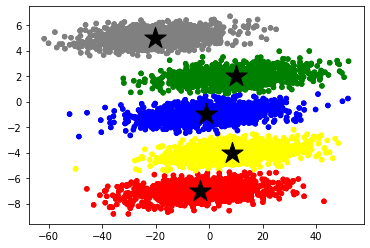

In [166]:
cm_dark = mpl.colors.ListedColormap(['grey', 'red', 'blue', 'green', 'yellow'])
# data points
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(new_idx), cmap=cm_dark, s=20)
# centroids
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='k', marker='*', s=500)
plt.show()

I notice this time using Mahalanobis Distance, we cluster the result in five horizontally groups which is in better cluster solution than the question one.

## Question 2b.) Calculate and print out the principle components of the aggregate data. 



[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


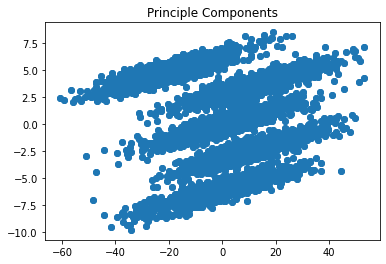

In [169]:
# Calculte the pca of the given data
def pca(d):
  # center
  mean = np.mean(d, axis=0)
  cent_data = d - mean

  cov = np.cov(cent_data.T)
  eigenvalues, eigenvectors = np.linalg.eig(cov)
  print(eigenvectors)

  # sort eigenvectors and eigenvalues
  idx = eigenvalues.argsort()[::-1]
  sort_eigenvectors = eigenvectors[:, idx]

  # use the sorted eigenvectors as the principal components
  pc = np.dot(cent_data, sort_eigenvectors)
  
  plt.scatter(pc[:, 0], pc[:, 1])
  plt.title('Principle Components')

  plt.show()


# For all aggregate data
pca(X)

## Question 2c.) Calculate and print out the principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?


[[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]


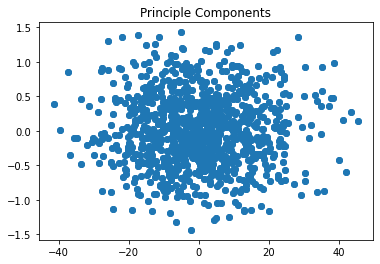

[[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]


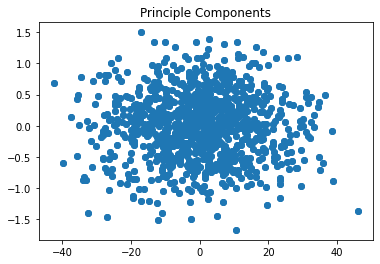

[[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]


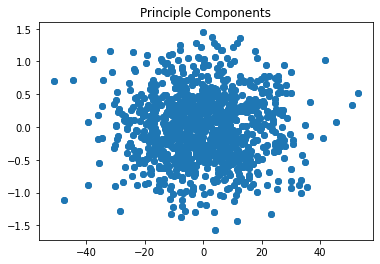

[[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]


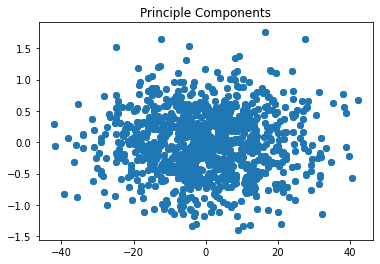

[[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]


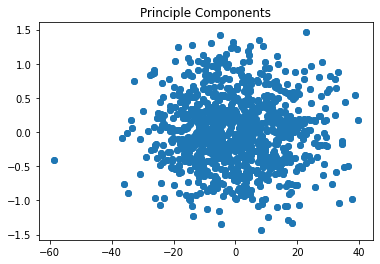

In [170]:
for c in range(5):
  index = np.where(new_idx == c)
  pca(X[index])

Principle components of clusters are not that same as the aggregate data. But each clusters are very similar and share same direction of each other.

## Question 2d.)

In [156]:
l,e = np.linalg.eig(P.T)
P1 = l*e
l = np.array([[l[0],0],[0,l[1]]])
P2 = l*e

In [152]:
P1

array([[9.44301625, 0.58344264],
       [0.51282107, 0.53717161]])

In [153]:
P2

array([[9.44301625, 0.        ],
       [0.        , 0.53717161]])

In [155]:
a, v = np.linalg.eig( P.T @ P )
v

array([[ 0.99992166, -0.01251662],
       [ 0.01251662,  0.99992166]])

From above, we can see observe that the eigenvectors of np.linalg.eig( P.T @ P ) are a square matrix similar to the cluster PCA components in Q2c, meaning that p' is a good projection that seperates out our data.